In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from google.colab import drive
import seaborn as sns
from IPython.display import Video, HTML
from matplotlib import rc
%matplotlib inline

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
PATH: str = '/content/drive/MyDrive/Sentinel2_Reflectance_Data.csv'

In [6]:
df: pd.DataFrame = pd.read_csv(PATH)

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', dayfirst=True)
# df['date'] = pd.to_datetime(df['date'], dayfirst=True)
# df['name'] = df['name'].astype(str)
df['name'] = df['name'].astype('category')
BAND_COLUMNS: list[str] = ['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B11','B12']
df[BAND_COLUMNS] = df[BAND_COLUMNS].astype(float)
df['WATER_PERCENTAGE'] = df['WATER_PERCENTAGE'].astype(float)
df['MEAN_SOLAR_AZIMUTH_ANGLE'] = df['MEAN_SOLAR_AZIMUTH_ANGLE'].astype(float)
df['MEAN_SOLAR_ZENITH_ANGLE'] = df['MEAN_SOLAR_ZENITH_ANGLE'].astype(float)
df.dropna(inplace=True)

In [8]:
df.head()

,name,date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,WATER_PERCENTAGE,MEAN_SOLAR_AZIMUTH_ANGLE,MEAN_SOLAR_ZENITH_ANGLE
0,ALGAS_Peri,2018-12-13,0.045906,0.037208,0.067797,0.033397,0.043371,0.020219,0.019767,0.014796,0.014325,0.005946,0.008657,0.007306,95.228422,85.764945,24.739731
1,SSI_Guaiba,2018-12-29,0.108220,0.127619,0.156475,0.165169,0.152394,0.089647,0.086927,0.084840,0.073448,0.066026,0.070047,0.063050,3.669931,79.864703,24.900569
2,AGUA_Jijoca,2019-01-22,0.140351,0.140907,0.179174,0.198595,0.252813,0.320556,0.348671,0.353484,0.383082,0.382955,0.448716,0.319774,10.286964,125.963148,29.382819
3,SSI_Guaiba,2019-01-25,0.046785,0.052390,0.075758,0.092626,0.094128,0.051136,0.051916,0.043823,0.034811,0.020154,0.013937,0.012685,24.071513,75.881539,30.963765
4,SSI_Guaiba,2019-01-28,0.058438,0.071540,0.093798,0.104817,0.103344,0.064322,0.064369,0.058274,0.052017,0.031139,0.038486,0.032930,10.801741,72.419156,29.397387


In [9]:
print(df.describe())

                                date          B1          B2          B3  \
count                            452  452.000000  452.000000  452.000000   
mean   2021-12-09 08:01:03.716814080    0.044650    0.052596    0.074073   
min              2018-12-13 00:00:00    0.002627    0.006682    0.010014   
25%              2020-05-31 06:00:00    0.021436    0.025948    0.050108   
50%              2021-10-22 12:00:00    0.034839    0.045337    0.066381   
75%              2023-05-20 06:00:00    0.045069    0.055110    0.079537   
max              2025-04-06 00:00:00    0.509585    0.485622    0.475092   
std                              NaN    0.051517    0.051113    0.049181   

               B4          B5          B6          B7          B8         B8A  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     0.063082    0.062986    0.037753    0.038081    0.035300    0.031579   
min      0.005711    0.003810    0.000607    0.000531    0.000072    0.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      452 non-null    category      
 1   date                      452 non-null    datetime64[ns]
 2   B1                        452 non-null    float64       
 3   B2                        452 non-null    float64       
 4   B3                        452 non-null    float64       
 5   B4                        452 non-null    float64       
 6   B5                        452 non-null    float64       
 7   B6                        452 non-null    float64       
 8   B7                        452 non-null    float64       
 9   B8                        452 non-null    float64       
 10  B8A                       452 non-null    float64       
 11  B9                        452 non-null    float64       
 12  B11                   

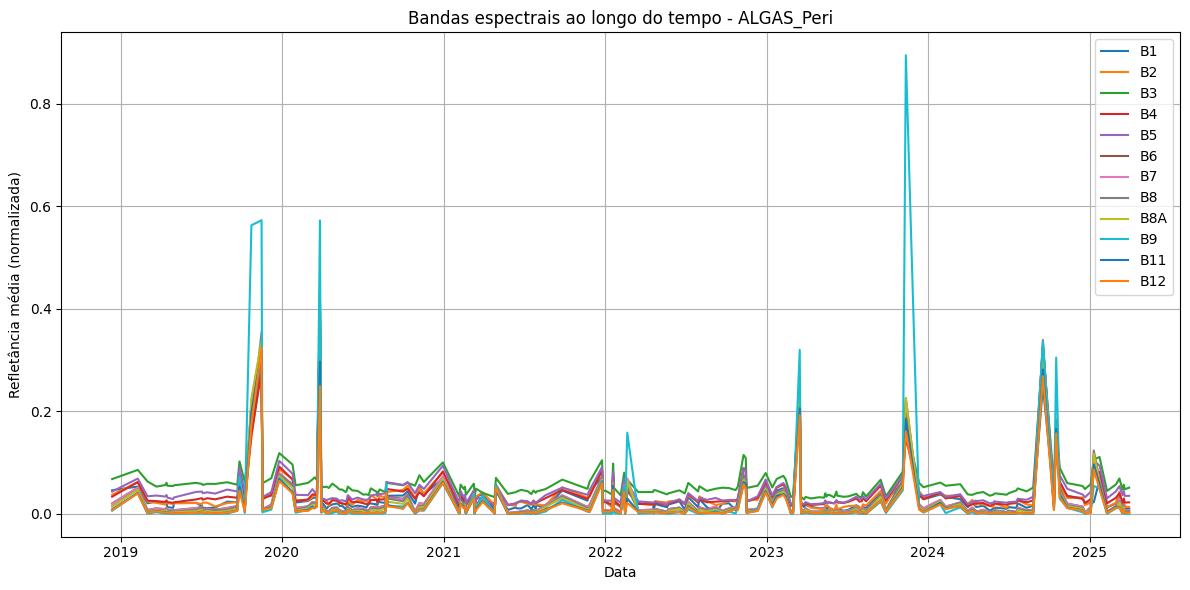

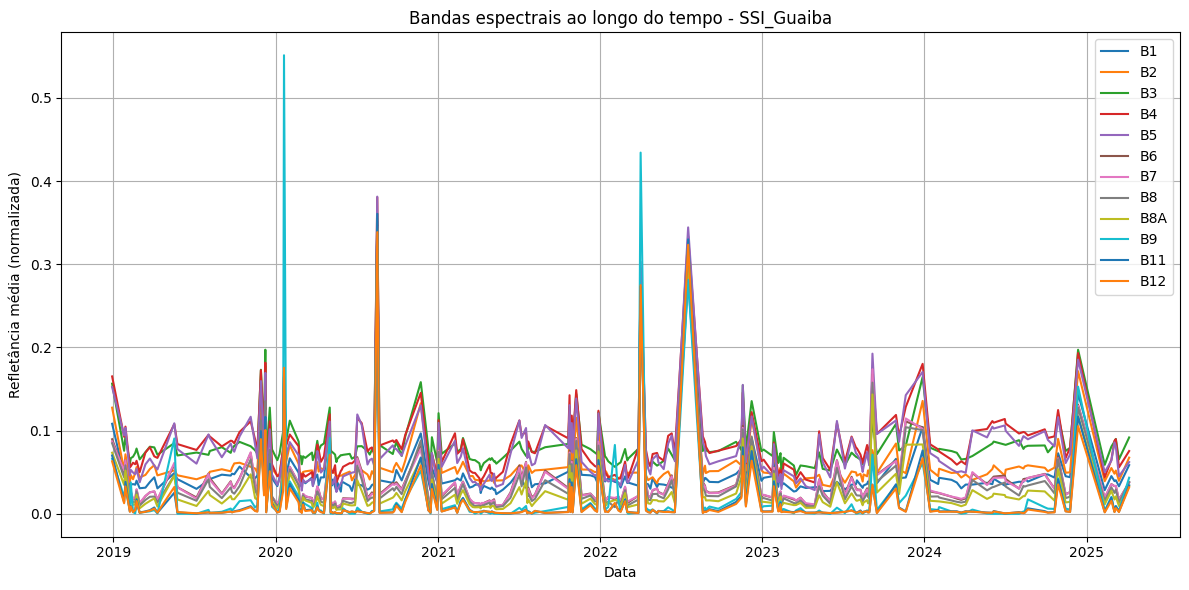

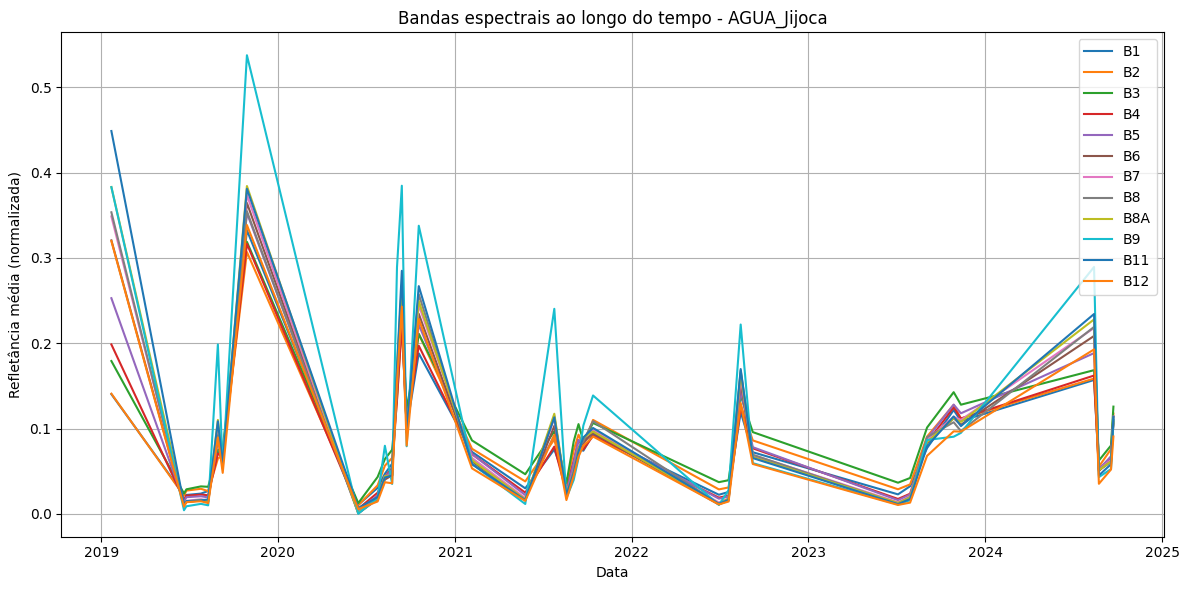

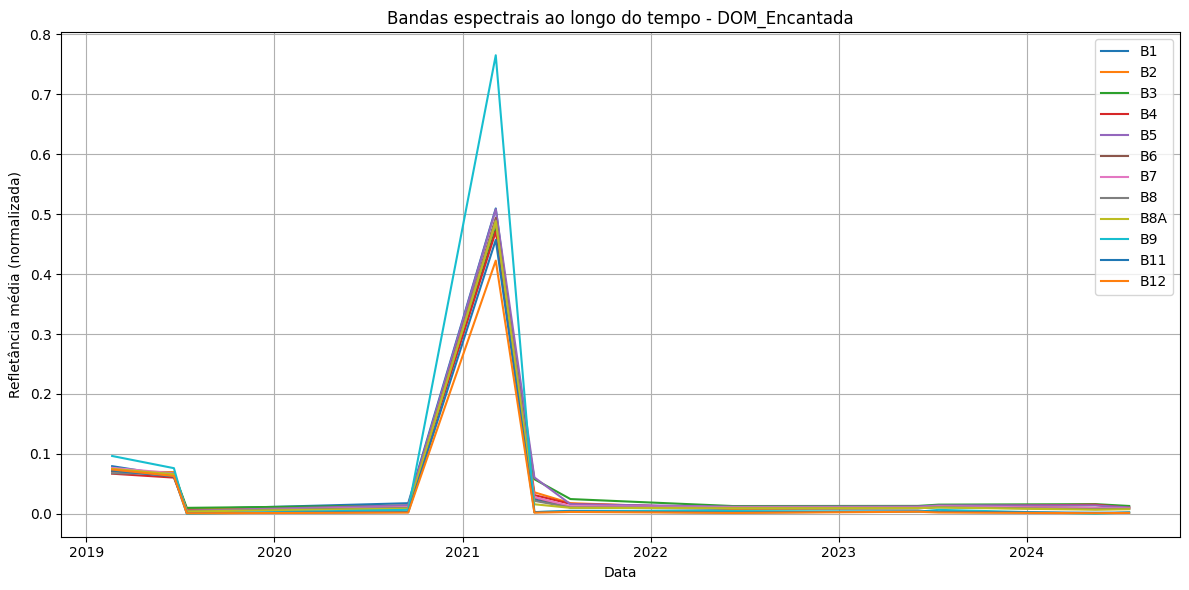

In [11]:
for name in df['name'].unique():
    df_local = df[df['name'] == name].sort_values(by='date')


    plt.figure(figsize=(12, 6))

    for band in BAND_COLUMNS:
        plt.plot(df_local['date'], df_local[band], label=band)

    plt.title(f'Bandas espectrais ao longo do tempo - {name}')
    plt.xlabel('Data')
    plt.ylabel('Refletância média (normalizada)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

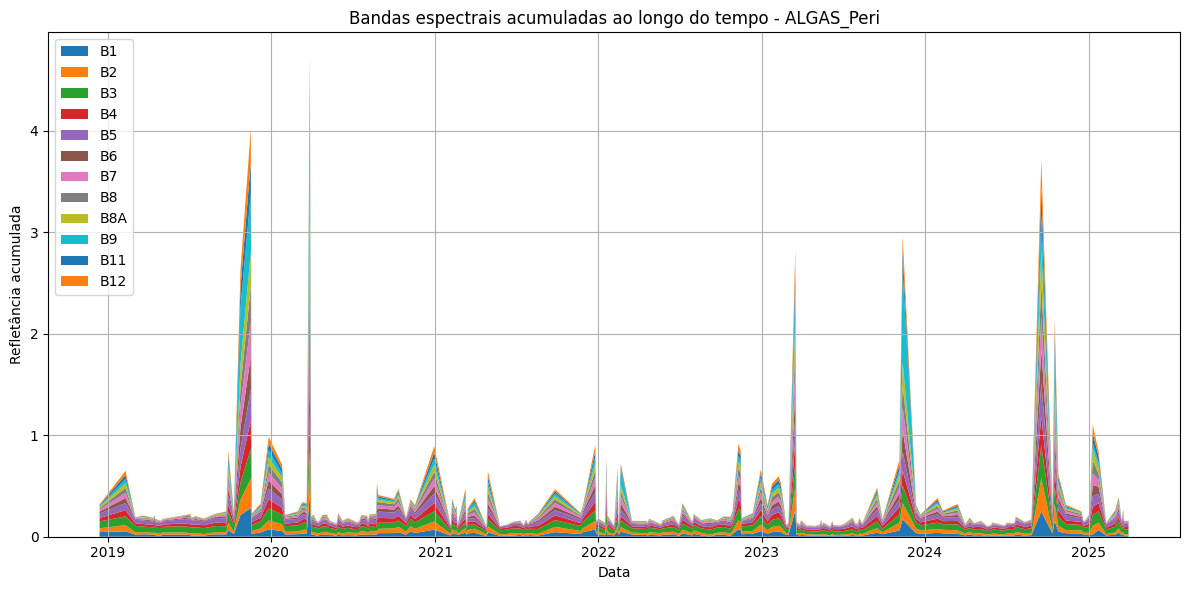

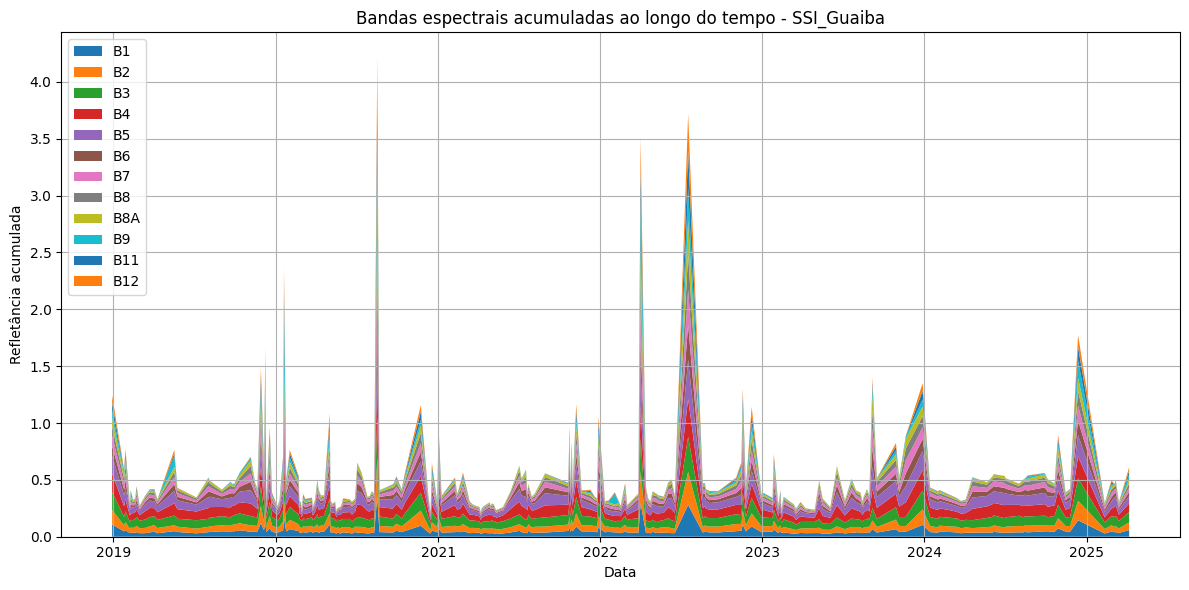

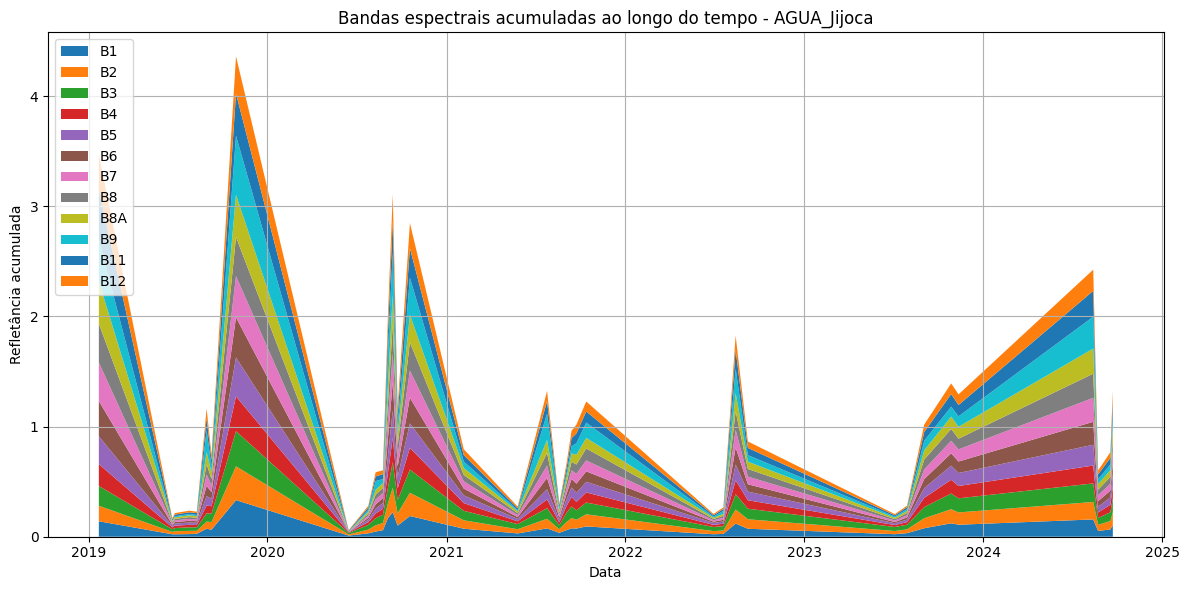

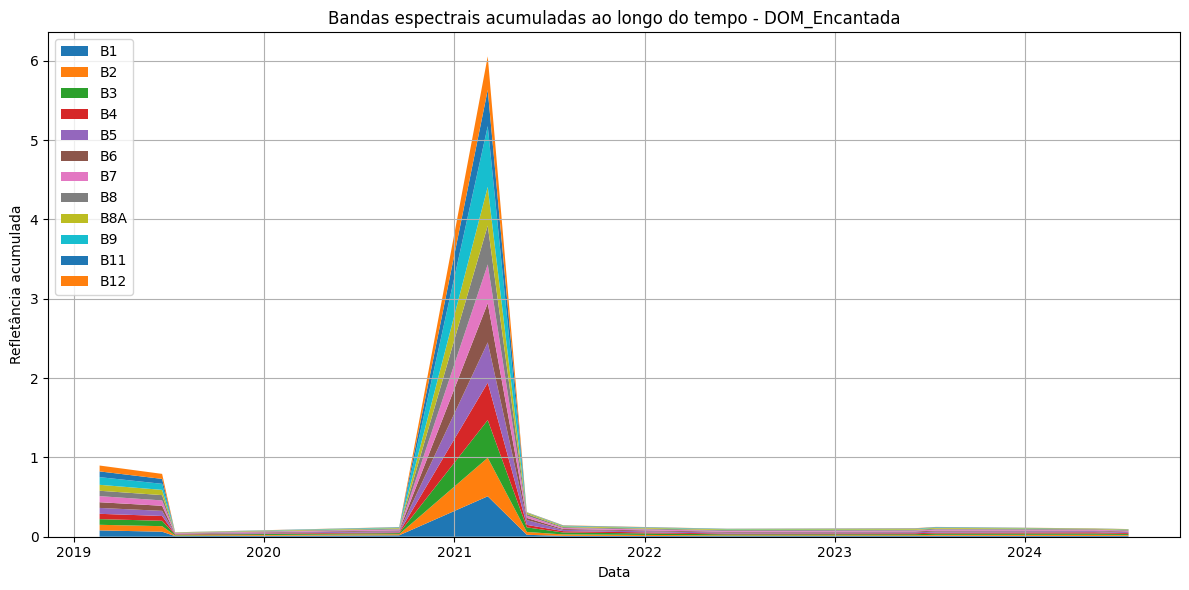

In [12]:
for name in df['name'].unique():
    df_local = df[df['name'] == name].sort_values('date')
    plt.figure(figsize=(12, 6))
    plt.stackplot(df_local['date'], [df_local[band] for band in BAND_COLUMNS], labels=BAND_COLUMNS, )
    plt.title(f'Bandas espectrais acumuladas ao longo do tempo - {name}')
    plt.xlabel('Data')
    plt.ylabel('Refletância acumulada')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

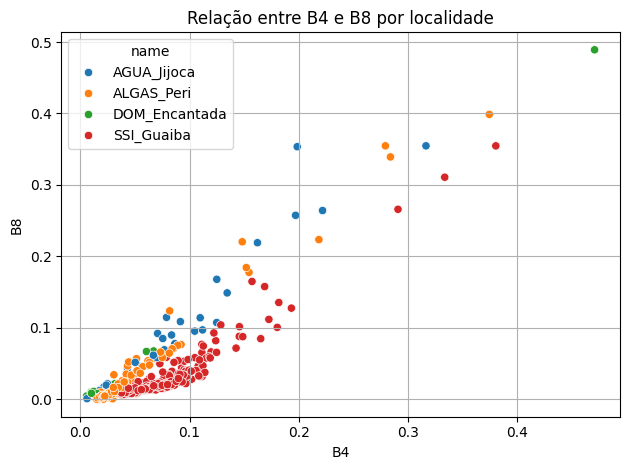

In [13]:
sns.scatterplot(data=df, x='B4', y='B8', hue='name', palette='tab10')
plt.title('Relação entre B4 e B8 por localidade')
plt.xlabel('B4')
plt.ylabel('B8')
plt.grid(True)
plt.tight_layout()
plt.show()

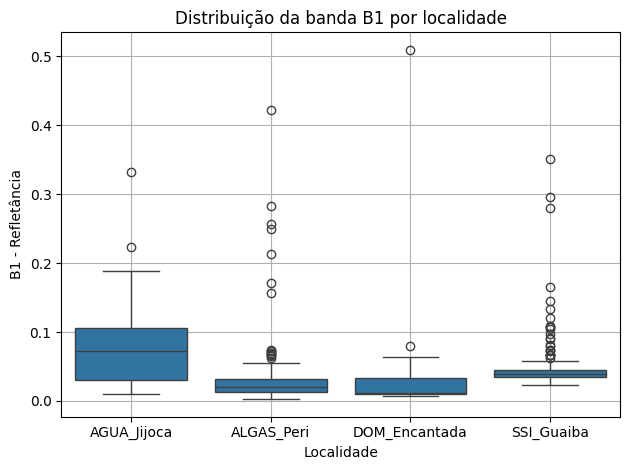

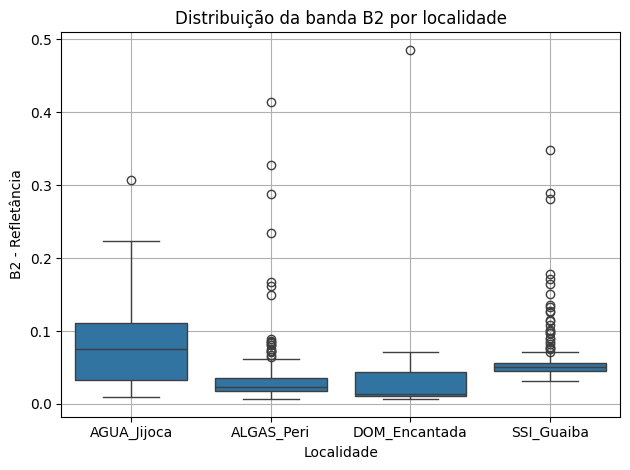

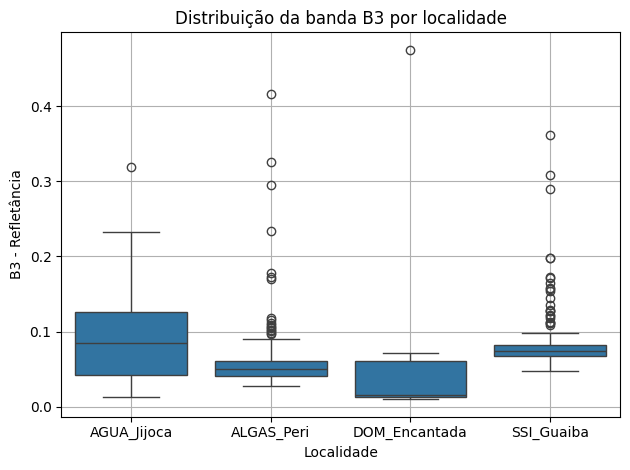

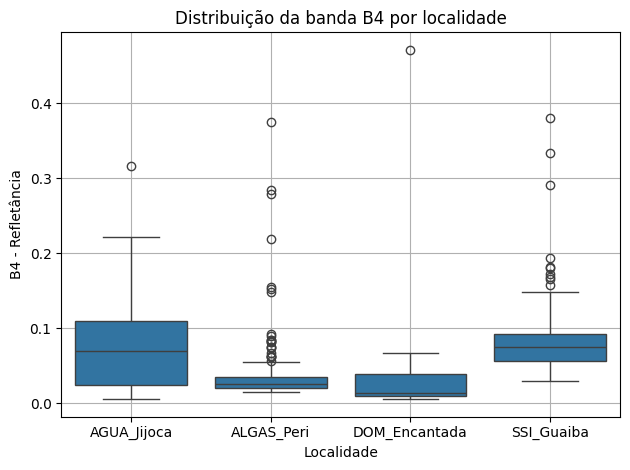

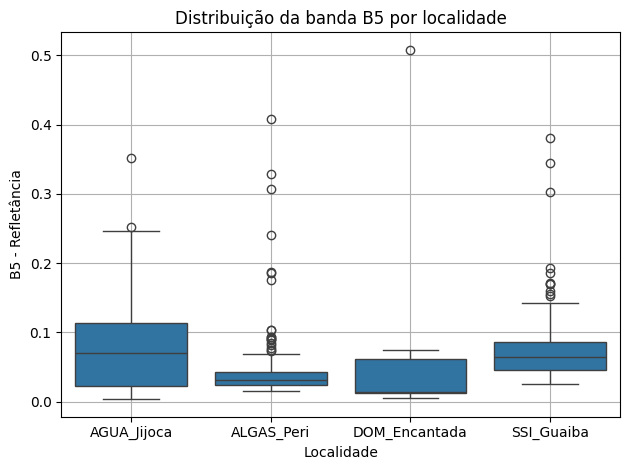

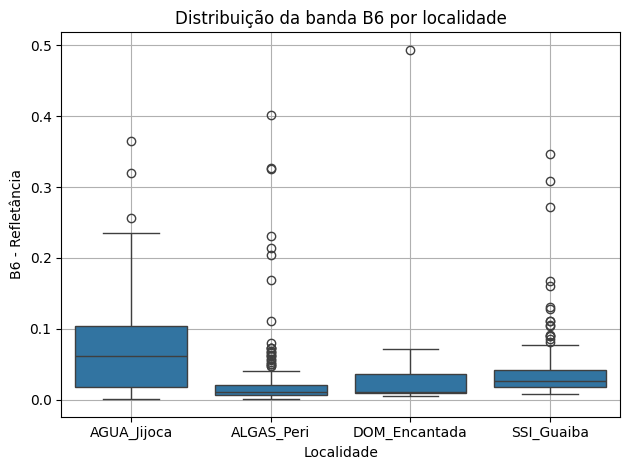

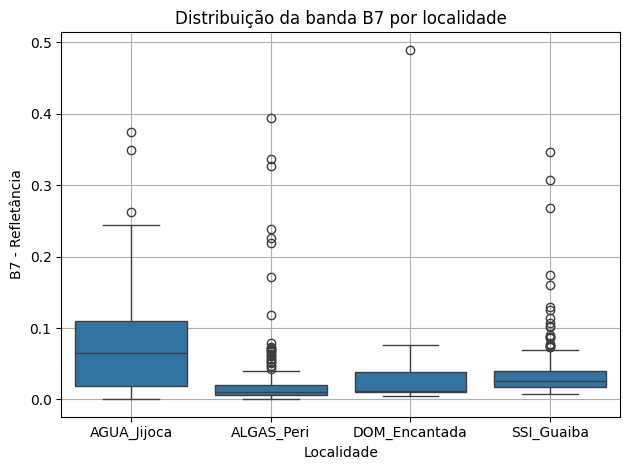

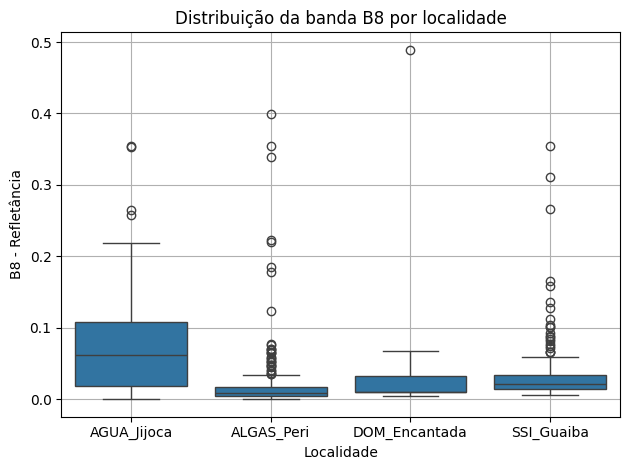

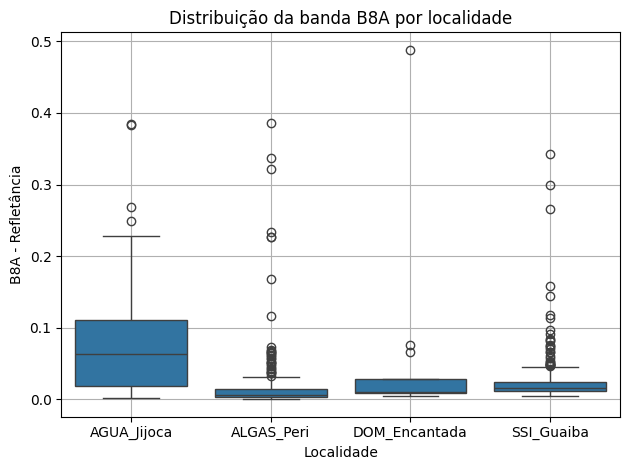

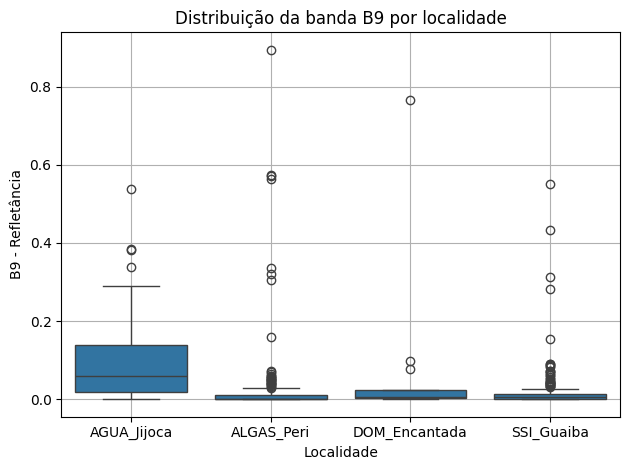

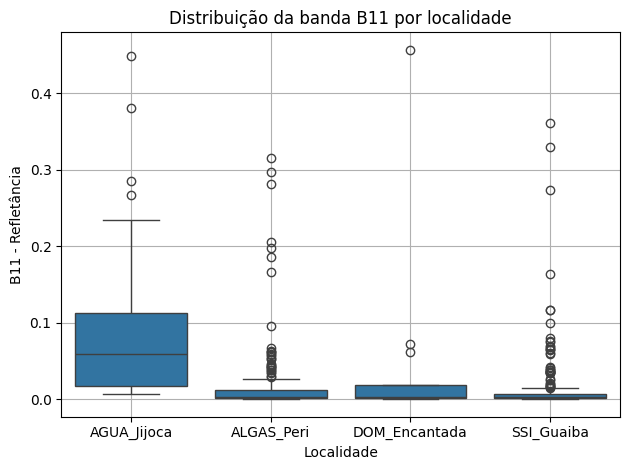

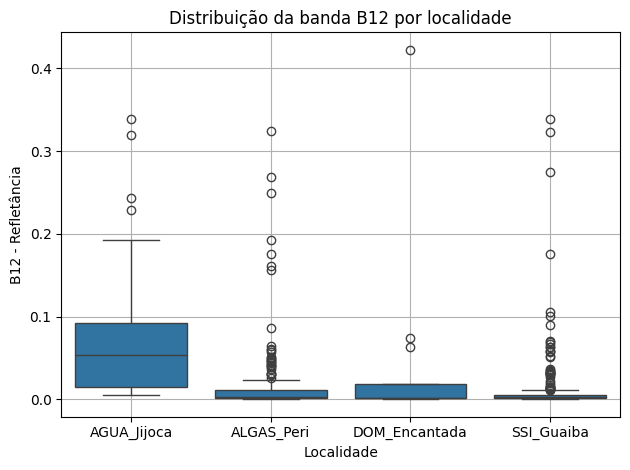

In [14]:
for band in BAND_COLUMNS:
    sns.boxplot(x='name', y=band, data=df)
    plt.title(f'Distribuição da banda {band} por localidade')
    plt.xlabel('Localidade')
    plt.ylabel(f'{band} - Refletância')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

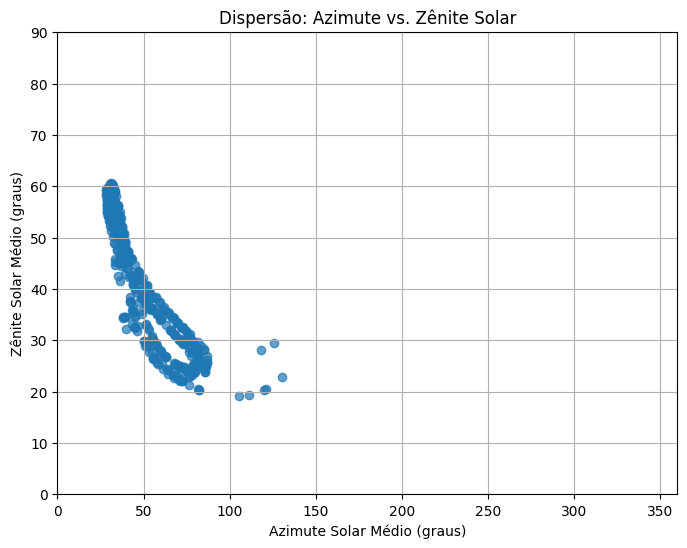

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['MEAN_SOLAR_AZIMUTH_ANGLE'], df['MEAN_SOLAR_ZENITH_ANGLE'], alpha=0.7)
plt.xlabel('Azimute Solar Médio (graus)')
plt.xlim(0, 360)
plt.ylabel('Zênite Solar Médio (graus)')
plt.ylim(0, 90)
plt.title('Dispersão: Azimute vs. Zênite Solar')
plt.grid(True)
plt.show()

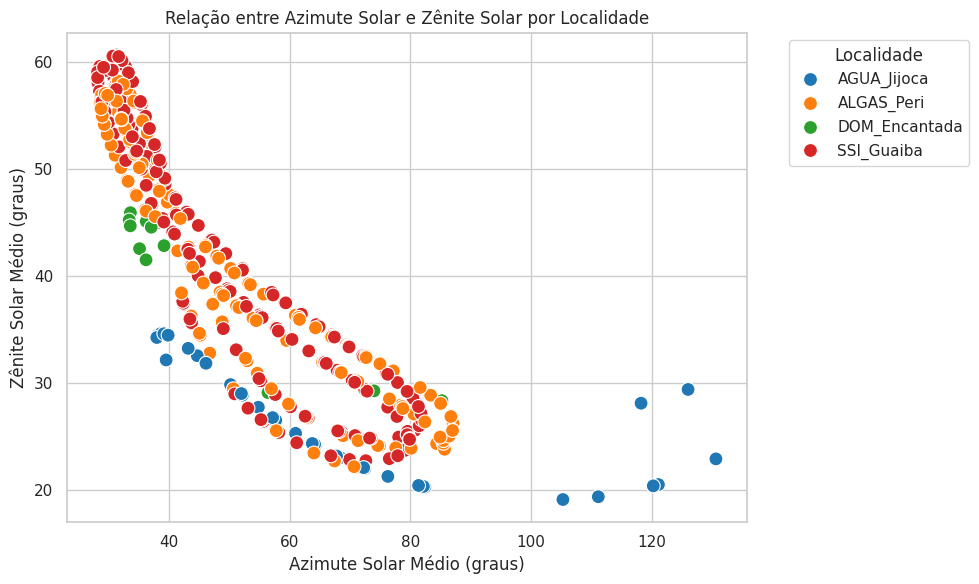

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='MEAN_SOLAR_AZIMUTH_ANGLE',
    y='MEAN_SOLAR_ZENITH_ANGLE',
    hue='name',
    palette='tab10',
    s=100
)

plt.title('Relação entre Azimute Solar e Zênite Solar por Localidade')
plt.xlabel('Azimute Solar Médio (graus)')
plt.ylabel('Zênite Solar Médio (graus)')
plt.legend(title='Localidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

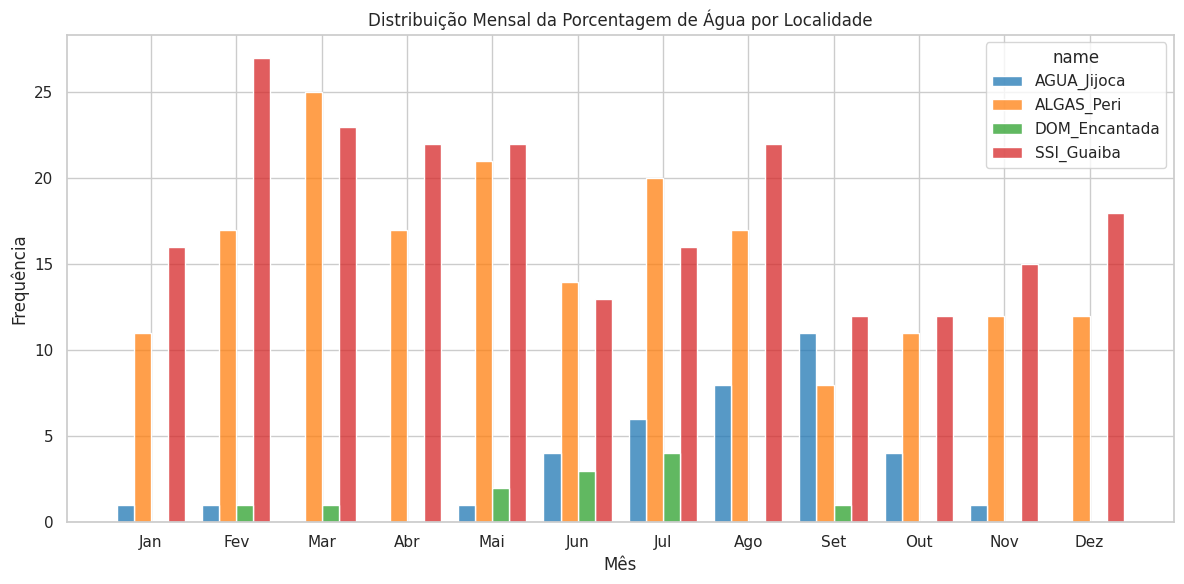

In [17]:
df['month'] = df['date'].dt.month

plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=df,
    x='month',
    hue='name',
    multiple='dodge',
    bins=12,
    shrink=0.8,
    palette='tab10',
    discrete=True
)

plt.title('Distribuição Mensal da Porcentagem de Água por Localidade')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.xticks(range(1, 13), [
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.tight_layout()
plt.show()

In [18]:
name_to_plot = 'ALGAS_Peri'
df_local = df[df['name'] == name_to_plot].sort_values(by='date')

first_10_dates = df_local['date'].unique()[:10]

for i, date_to_plot in enumerate(first_10_dates):
    df_date = df_local[df_local['date'] == date_to_plot]

    if not df_date.empty:
        df_band_values = df_date[BAND_COLUMNS].T
        df_band_values.columns = ['Reflectance']

        plt.figure(figsize=(10, 6))
        plt.plot(df_band_values.index, df_band_values['Reflectance'], marker='o', linestyle='-')

        plt.title(f'Valores das Bandas para {name_to_plot} em {date_to_plot.strftime("%d-%m-%Y")}')
        plt.xlabel('Banda')
        plt.ylabel('Valor de Refletância')
        plt.grid(True)
        plt.tight_layout()

        filename = f'{name_to_plot}_{date_to_plot.strftime("%Y%m%d")}.pdf'
        plt.savefig(filename)

        plt.close()

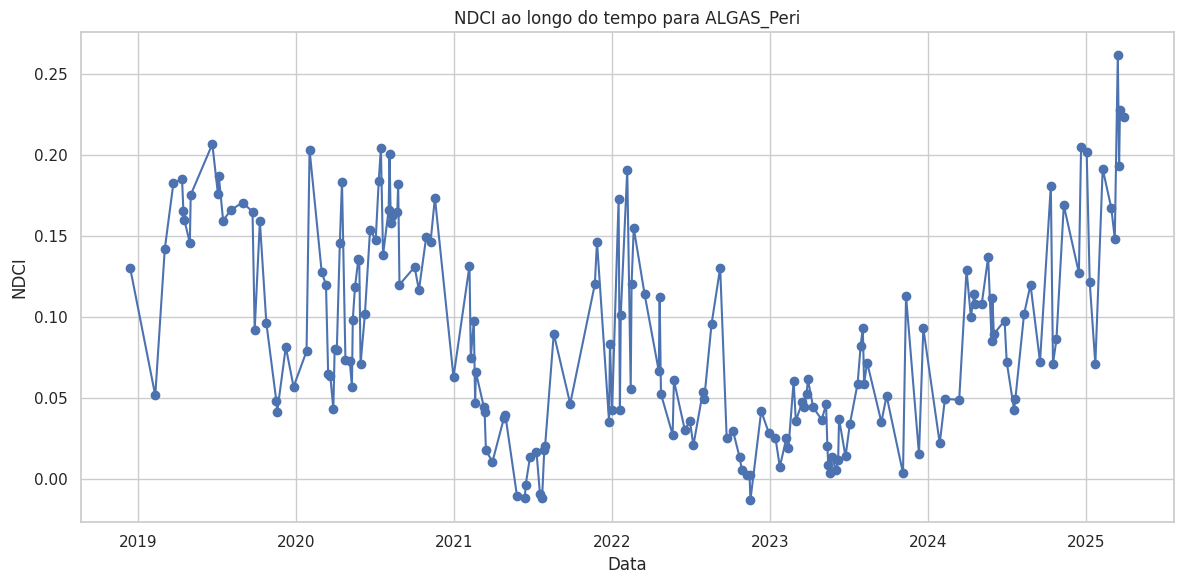

In [19]:

df['NDCI'] = (df['B5'] - df['B4']) / (df['B5'] + df['B4'])

df_algas_peri = df[df['name'] == 'ALGAS_Peri'].sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(df_algas_peri['date'], df_algas_peri['NDCI'], marker='o', linestyle='-')

plt.title('NDCI ao longo do tempo para ALGAS_Peri')
plt.xlabel('Data')
plt.ylabel('NDCI')
plt.grid(True)
plt.tight_layout()
plt.show()

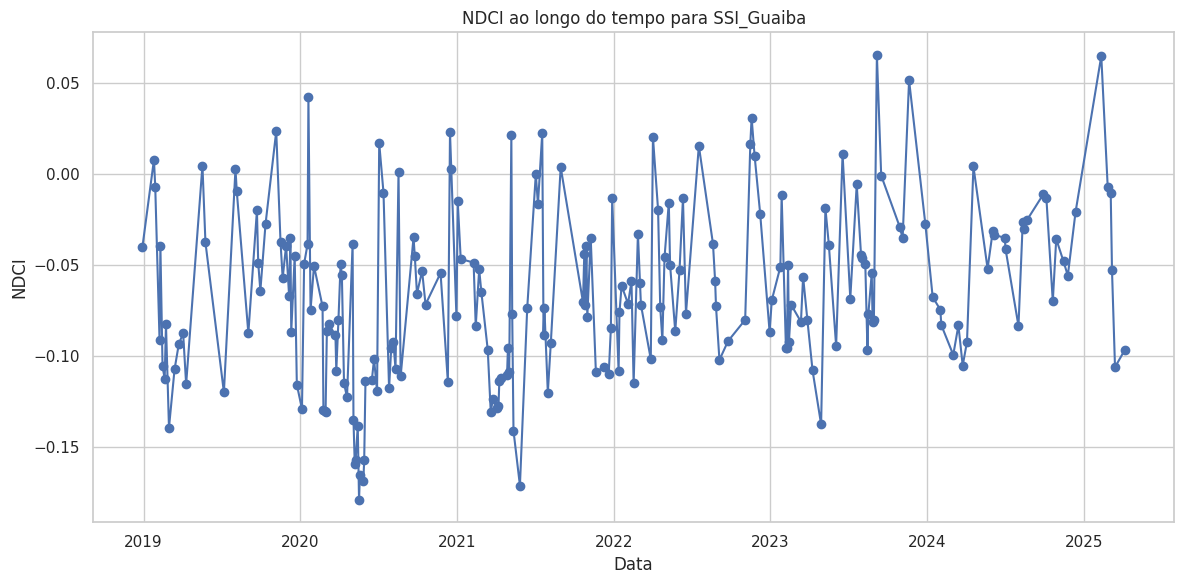

In [20]:

df['NDCI'] = (df['B5'] - df['B4']) / (df['B5'] + df['B4'])
df_algas_peri = df[df['name'] == 'SSI_Guaiba'].sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(df_algas_peri['date'], df_algas_peri['NDCI'], marker='o', linestyle='-')

plt.title('NDCI ao longo do tempo para SSI_Guaiba')
plt.xlabel('Data')
plt.ylabel('NDCI')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
def plotar_valores_das_bandas_por_indices(df: pd.DataFrame, nome: int, data: int) -> None:
    nomes_unicos = sorted(df['name'].unique())

    if nome >= len(nomes_unicos):
        print(f"Índice de nome inválido. Nomes: {len(nomes_unicos)}")
        return

    nome_alvo = nomes_unicos[nome]
    subconjunto = df[df['name'] == nome_alvo]

    if subconjunto.empty:
        print(f"Nenhum dado encontrado para o nome '{nome_alvo}'.")
        return

    datas_unicas = sorted(subconjunto['date'].unique())

    if data >= len(datas_unicas):
        print(f"Índice de data inválido. Datas: {len(datas_unicas)} {nome_alvo}")
        return

    data_alvo = datas_unicas[data]

    filtrado = subconjunto[subconjunto['date'] == data_alvo]

    if filtrado.empty:
        print(f"Nenhum dado encontrado para o nome='{nome_alvo}' na data='{data_alvo.strftime('%d-%m-%Y')}'.")
        return

    valores_bandas = filtrado[BAND_COLUMNS].iloc[0]

    plt.figure(figsize=(10, 6))
    plt.bar(BAND_COLUMNS, valores_bandas)
    plt.title(f'Valores das Bandas para {nome_alvo} em {data_alvo.strftime("%d-%m-%Y")}')
    plt.xlabel('Bandas')
    plt.ylabel('Valor ou Reflectância')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

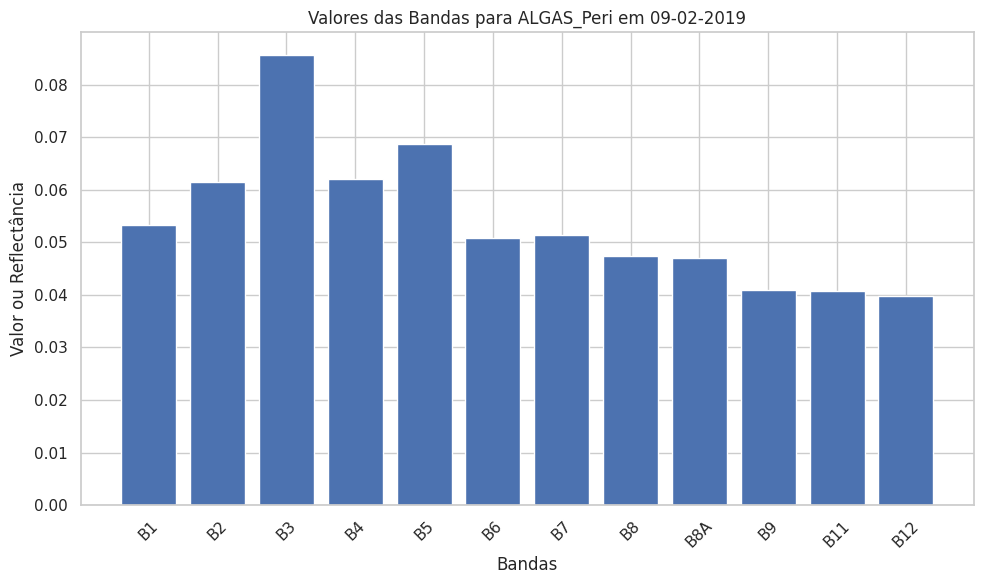

In [22]:
plotar_valores_das_bandas_por_indices(df, 1, 1)

In [23]:
print(len(df['name'].unique()))

4


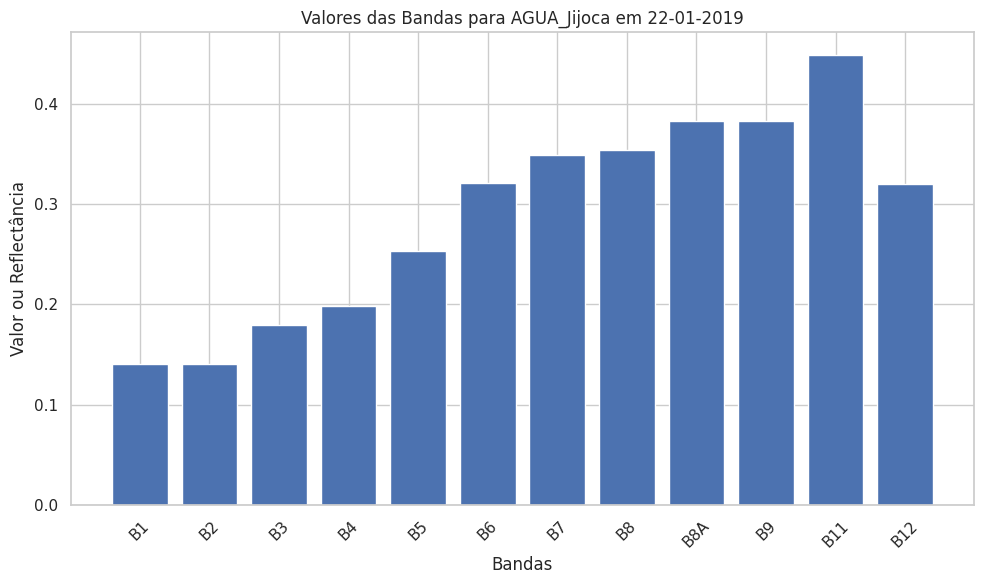

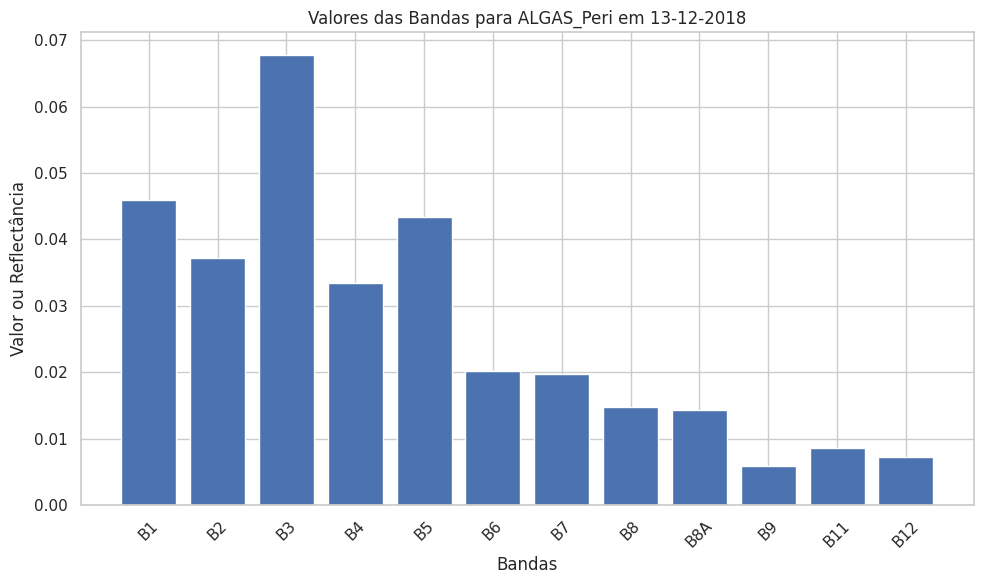

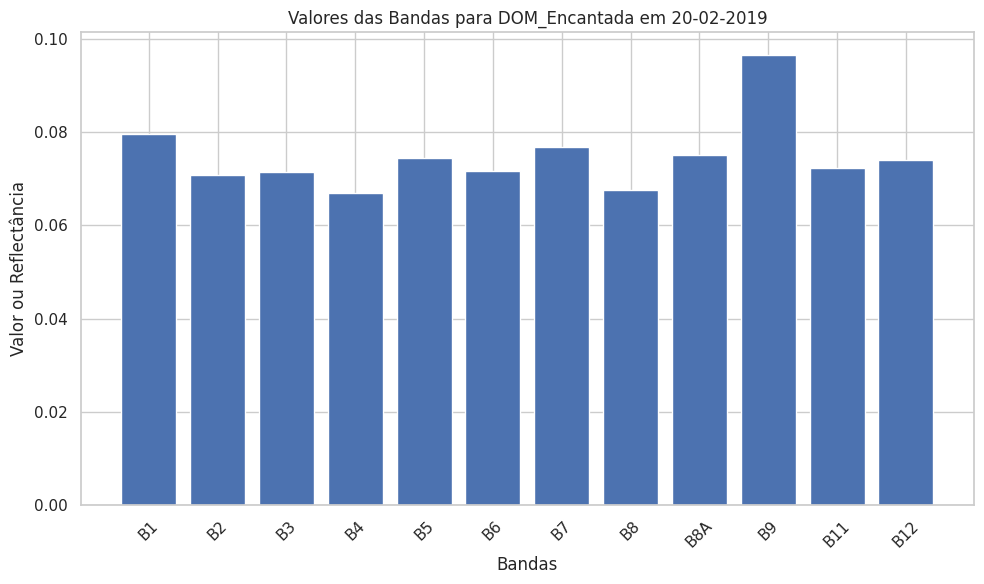

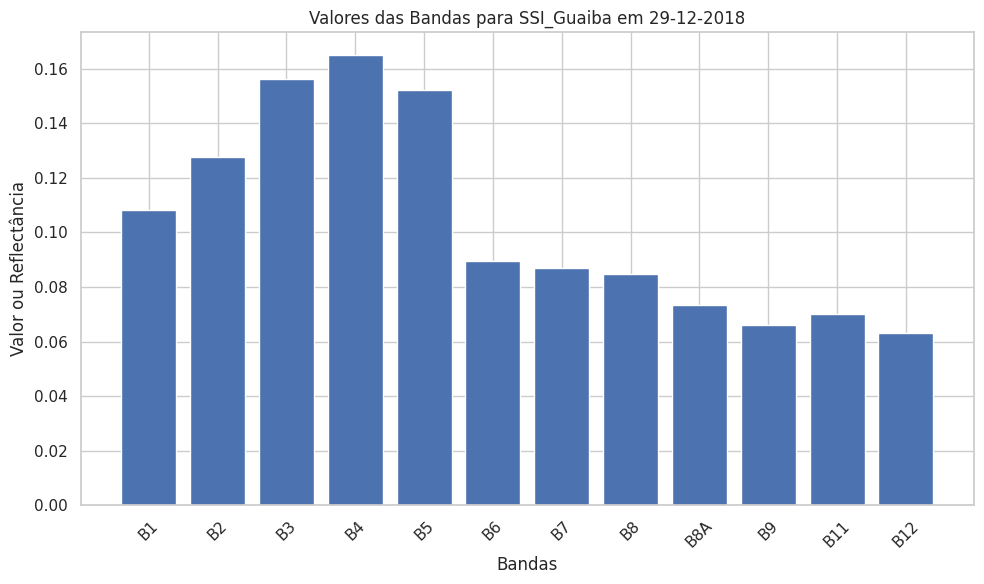

In [24]:
for i in range(len(df['name'].unique())):
    plotar_valores_das_bandas_por_indices(df, i, 0)

In [31]:
def animar_bandas_por_nome(df: pd.DataFrame, indice_nome: int, intervalo_ms: int = 1000) -> animation.FuncAnimation:
    nomes_unicos = sorted(df['name'].unique())
    if indice_nome >= len(nomes_unicos):
        print(f"Índice de nome inválido. Existem apenas {len(nomes_unicos)} nomes únicos.")
        return

    nome_alvo = nomes_unicos[indice_nome]
    subconjunto = df[df['name'] == nome_alvo]

    if subconjunto.empty:
        print(f"Nenhum dado encontrado para o nome '{nome_alvo}'.")
        return

    datas = subconjunto['date'].tolist()
    valores_bandas = subconjunto[BAND_COLUMNS].values

    fig, ax = plt.subplots(figsize=(10, 6))
    barras = ax.bar(BAND_COLUMNS, valores_bandas[0], color='cornflowerblue')
    titulo = ax.set_title('')
    ax.set_ylim(0, max(valores_bandas.max(), 0.5))
    ax.set_xlabel('Bandas')
    ax.set_ylabel('Valor ou Reflectância')
    ax.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()

    def atualizar(frame):
        for barra, novo_valor in zip(barras, valores_bandas[frame]):
            barra.set_height(novo_valor)
        data_str = datas[frame].strftime('%d-%m-%Y')
        titulo.set_text(f'{nome_alvo} - {data_str}')
        return barras

    ani = animation.FuncAnimation(
        fig, atualizar, frames=len(datas), interval=intervalo_ms, blit=False, repeat=False
    )

    return ani


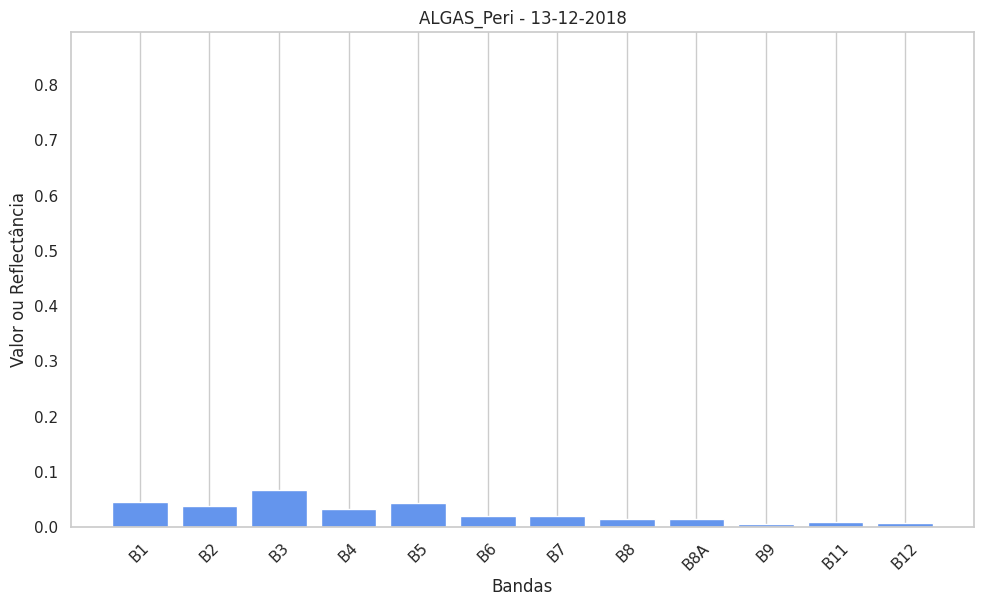

In [32]:
ani = animar_bandas_por_nome(df, indice_nome=1, intervalo_ms=500)
ani.save('animacao.mp4', writer='ffmpeg', fps=2)
rc('animation', html='html5')
HTML(ani.to_html5_video())